In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(8)

In [2]:
df = pd.read_csv('Caravan.csv', index_col = False)



In [3]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [4]:
df.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

# Change the column "Purchase" from Yes/No to binary result for analysis

In [5]:
df['Purchase'].replace('Yes',1, inplace=True)
df['Purchase'].replace('No', 0, inplace = True)

In [6]:
df['Purchase']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5792    1
5793    1
5794    1
5795    1
5796    1
5797    1
5798    1
5799    1
5800    1
5801    1
5802    1
5803    1
5804    1
5805    1
5806    1
5807    1
5808    1
5809    1
5810    1
5811    1
5812    1
5813    1
5814    1
5815    1
5816    1
5817    1
5818    1
5819    1
5820    1
5821    1
Name: Purchase, dtype: int64

In [7]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [8]:
print(df.describe(exclude=None))

           MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      0.696496     4.626932     1.069907     3.258502     6.183442   
std       1.003234     1.715843     1.017503     1.597647     1.909482   
min       0.000000     0.000000     0

In [9]:
import seaborn as sns

In [10]:
print(df.columns)

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

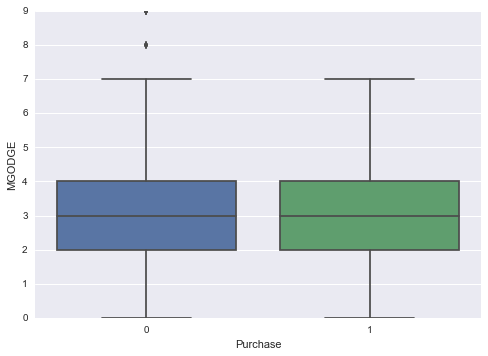

In [82]:
sns.boxplot(x="Purchase",y="MGODGE", data=df)

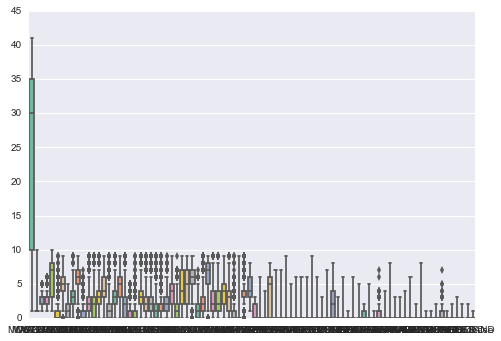

In [12]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")

# Test Train Split

In [13]:
X = df[ ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK','MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN','MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG','MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA','MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2','MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575','MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR','PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG','PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG','PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED','PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT','AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM','ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL','APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND'] ].values

y = df['Purchase']

In [14]:
seed = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

print(X_train.shape)
print(X_test.shape)

(4657, 85)
(1165, 85)


## Logistic Regression

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf


lr = LogisticRegression()
parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}

clf = GridSearchCV(lr, parameters, cv = 5)

clf.fit(X_train, y_train)

best_clf = clf.best_estimator_

y_hat = best_clf.predict(X_test)
print(confusion_matrix(y_test, y_hat) )

print("Best accuracy score for Logistic Regression: %0.4f"% accuracy_score(y_test, y_hat) )

best_clf


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

[[1087    1]
 [  76    1]]
Best accuracy score for Logistic Regression: 0.9339


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

# KNN

In [21]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2,5,10] }

clf = GridSearchCV(knn, parameters, cv = 5)

clf.fit(X_train, y_train)
clf.grid_scores_

y_hat = clf.predict(X_test)

print(confusion_matrix(y_test, y_hat) )
accuracy_score(y_test, y_hat)

[[1088    0]
 [  77    0]]


0.93390557939914165

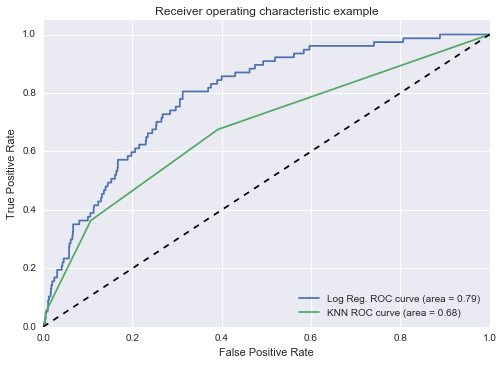

In [23]:
from sklearn.metrics import roc_curve, auc
y_hat_proba = best_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])

roc_auc = auc(fpr, tpr)


knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_hat[:,1])
knn_roc_auc = auc(knn_fpr, knn_tpr)


plt.figure()
plt.plot(fpr, tpr, label='Log Reg. ROC curve (area = %0.2f)' % roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
df.drop(['APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND','AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG','AZEILPL','ABRAND','ABESAUT',
         'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AGEZONG', 'AWAOREG','AWAPART','PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PINBOED', 'PBYSTAND','APERSAUT','AWABEDR','PPERSAUT', 'PBESAUT', 'PMOTSCO','PWABEDR','MINKGEM', 'MKOOPKLA','PWAPART', 'PWALAND', 'AWALAND'],inplace=True,axis=1,errors='ignore')

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'Purchase'],
      dtype='object')


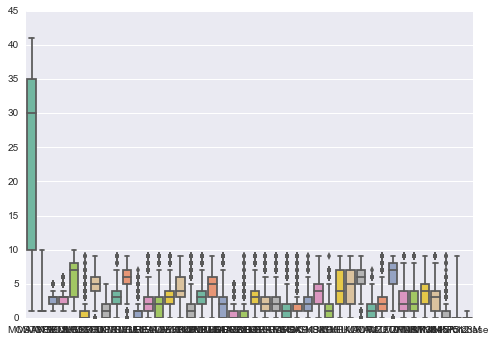

In [50]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")
print(df.columns)

In [54]:
X = df[ ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2','MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575','MINK7512', 'MINK123M']]
y = df ['Purchase']

In [55]:
seed = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

print(X_train.shape)
print(X_test.shape)

(4657, 41)
(1165, 41)


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf


lr = LogisticRegression()
parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}

clf = GridSearchCV(lr, parameters, cv = 5)

clf.fit(X_train, y_train)

best_clf = clf.best_estimator_

y_hat = best_clf.predict(X_test)
print(confusion_matrix(y_test, y_hat) )

print("Best accuracy score for Logistic Regression: %0.4f"% accuracy_score(y_test, y_hat) )

best_clf


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

[[1088    0]
 [  77    0]]
Best accuracy score for Logistic Regression: 0.9339


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2,5,10] }

clf = GridSearchCV(knn, parameters, cv = 5)

clf.fit(X_train, y_train)
clf.grid_scores_

y_hat = clf.predict(X_test)

print(confusion_matrix(y_test, y_hat) )
accuracy_score(y_test, y_hat)

[[1088    0]
 [  77    0]]


0.93390557939914165

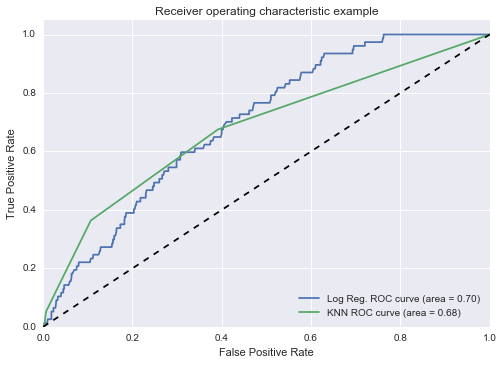

In [58]:
from sklearn.metrics import roc_curve, auc
y_hat_proba = best_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])

roc_auc = auc(fpr, tpr)


knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_hat[:,1])
knn_roc_auc = auc(knn_fpr, knn_tpr)


plt.figure()
plt.plot(fpr, tpr, label='Log Reg. ROC curve (area = %0.2f)' % roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [74]:
df = pd.read_csv('Caravan.csv', index_col = False)
df['Purchase'].replace('Yes',1, inplace=True)
df['Purchase'].replace('No', 0, inplace = True)
print(df.columns)

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

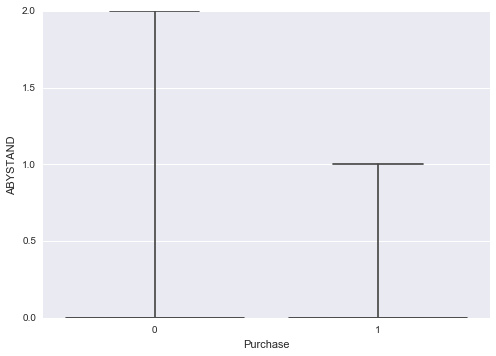

In [161]:
sns.boxplot(x="Purchase",y="ABYSTAND", data=df)

In [162]:
df.drop(df.columns[[2,3,5,6,7,8,13,14,19,21,22,23,26,32,37,40,43,45,47,48,51,53,56,60,61,63,66,76,77,80,81,82,83]], axis=1, inplace=True)

In [163]:
seed = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

print(X_train.shape)
print(X_test.shape)

(4657, 41)
(1165, 41)


Index(['MOSTYPE', 'MAANTHUI', 'MOSHOOFD', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERBOER',
       'MSKA', 'MSKB1', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0',
       'MZFONDS', 'MZPART', 'MINKM30', 'MINK4575', 'MINK7512', 'MINKGEM',
       'MKOOPKLA', 'PWABEDR', 'PPERSAUT', 'PVRAAUT', 'PAANHANG', 'PWERKT',
       'PLEVEN', 'PPERSONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PINBOED',
       'AWAPART', 'AWABEDR', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT',
       'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'AWAOREG',
       'ABRAND', 'ABYSTAND', 'Purchase'],
      dtype='object')


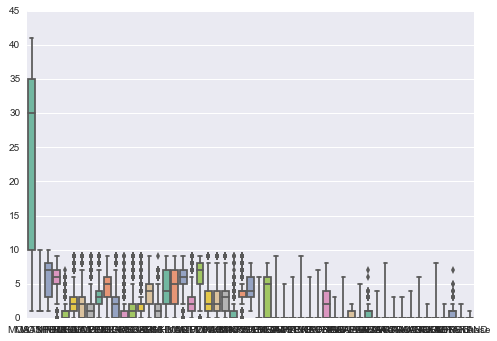

In [164]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")
print(df.columns)

In [172]:
X = df[['MOSTYPE', 'MAANTHUI', 'MOSHOOFD', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERBOER', 'MSKA', 'MSKB1', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK4575', 'MINK7512', 'MINKGEM', 'MKOOPKLA', 'PWABEDR', 'PPERSAUT', 'PVRAAUT', 'PAANHANG', 'PWERKT', 'PLEVEN', 'PPERSONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PINBOED', 'AWAPART', 'AWABEDR', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'AWAOREG', 'ABRAND', 'ABYSTAND',]]
        
y = df['Purchase'] 

seed = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

print(X_train.shape)
print(X_test.shape)

(4657, 52)
(1165, 52)


In [173]:
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf


lr = LogisticRegression()
parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}

clf = GridSearchCV(lr, parameters, cv = 5)

clf.fit(X_train, y_train)

best_clf = clf.best_estimator_

y_hat = best_clf.predict(X_test)
print(confusion_matrix(y_test, y_hat) )

print("Best accuracy score for Logistic Regression: %0.4f"% accuracy_score(y_test, y_hat) )

best_clf


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

[[1088    0]
 [  77    0]]
Best accuracy score for Logistic Regression: 0.9339


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [174]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [2,5,10] }

clf = GridSearchCV(knn, parameters, cv = 5)

clf.fit(X_train, y_train)
clf.grid_scores_

y_hat = clf.predict(X_test)

print(confusion_matrix(y_test, y_hat) )
accuracy_score(y_test, y_hat)

[[1087    1]
 [  77    0]]


0.93304721030042914

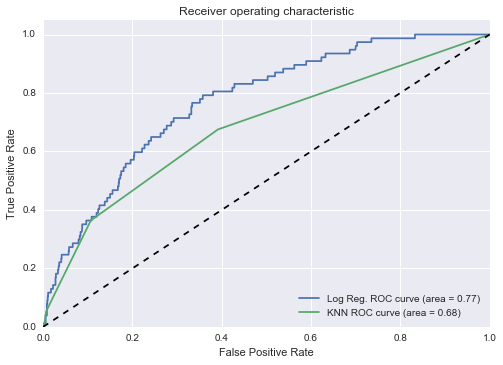

In [175]:
from sklearn.metrics import roc_curve, auc
y_hat_proba = best_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_hat_proba[:,1])

roc_auc = auc(fpr, tpr)


knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_hat[:,1])
knn_roc_auc = auc(knn_fpr, knn_tpr)


plt.figure()
plt.plot(fpr, tpr, label='Log Reg. ROC curve (area = %0.2f)' % roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()